In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Normal distribution

In [2]:
normal_dist = {"mean=0 std_dev=1":np.random.normal(size=5000),
               "mean=0 std_dev=0.5":np.random.normal(scale=0.5, size=5000),
               "mean=0 std_dev=5":np.random.normal(scale=5, size=5000),
               "mean=0.5 std_dev=1":np.random.normal(loc=0.5, size=5000),
               "mean=2 std_dev=1":np.random.normal(loc=2, size=5000)}

In [3]:
df = pd.DataFrame(data = normal_dist)

In [4]:
df_melt = pd.melt(df, var_name = 'parameter', value_name = 'value')

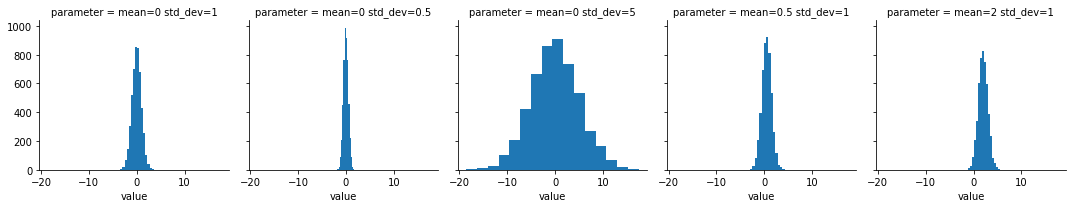

In [5]:
g = sns.FacetGrid(df_melt, col="parameter", sharex = True)
g.map(plt.hist,'value',cumulative=False, bins=16)

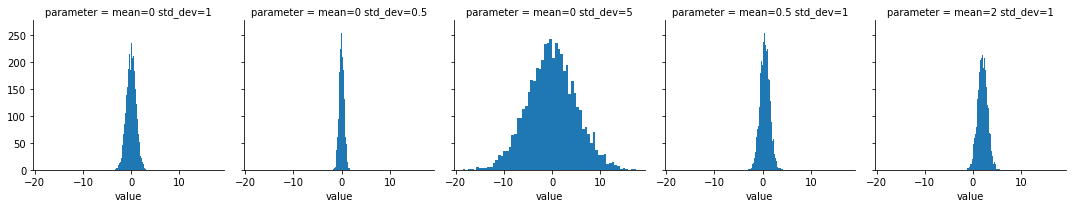

In [6]:
g = sns.FacetGrid(df_melt, col="parameter", sharex = True)
g.map(plt.hist,'value',cumulative=False, bins=64)

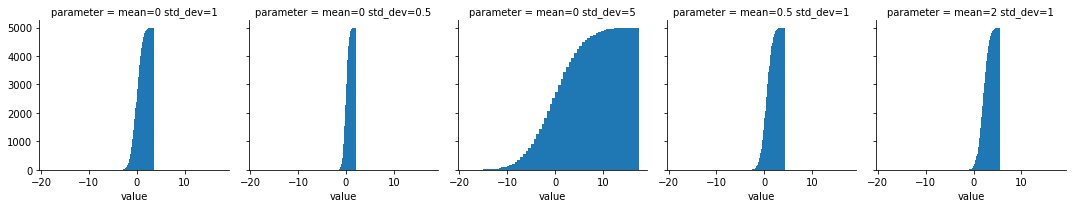

In [7]:
g = sns.FacetGrid(df_melt, col="parameter", sharex = True)
g.map(plt.hist,'value',cumulative=True, bins=64)

Changing tne mean ('loc' parameter) changes the histogram's position along the x axis.

Changing the standard deviation ('scale' parameter) influences the shape of the histogram - the bigger the parameter, the wider the histogram.

Number of bins defines the resolution of output histogram.

Turning on the 'cumulative' parameter makes that the height of the bin is a sum of value in current bin and value in the previous one, so the histogram goes from 0 to 5000, which is the total number of samples.

2. Inverse logit

In [8]:
from scipy.special import logit, expit

df_logit = logit(df)

df_logit_melt = pd.melt(df_logit, var_name = 'parameter', value_name = 'value')

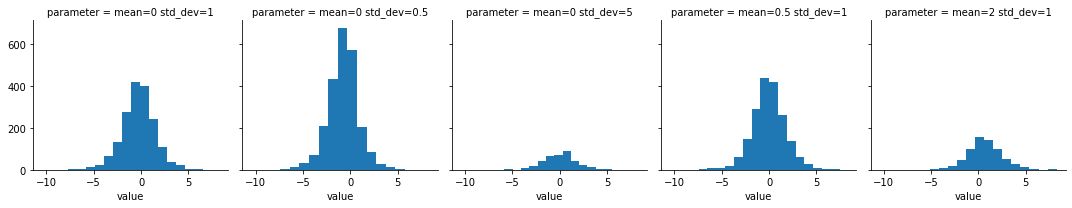

In [9]:
g = sns.FacetGrid(df_logit_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=16)

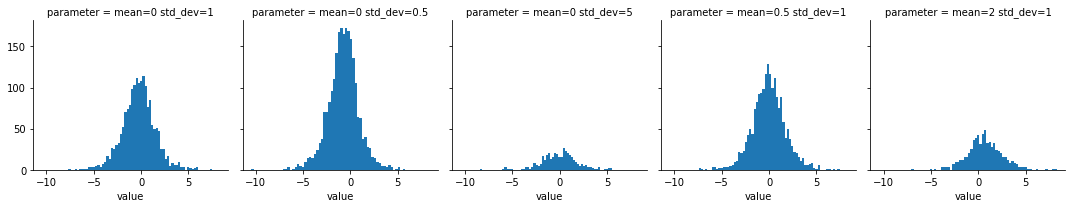

In [10]:
g = sns.FacetGrid(df_logit_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=64)

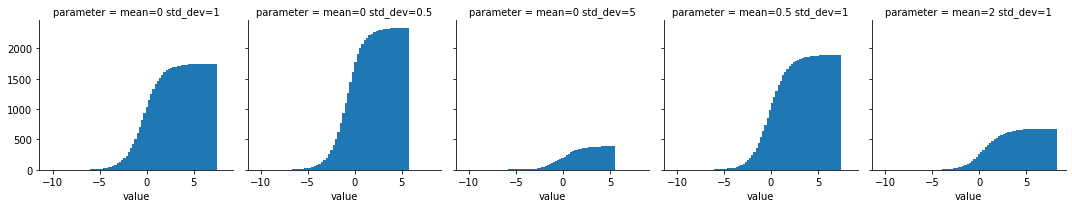

In [11]:
g = sns.FacetGrid(df_logit_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=True,bins=64)

Using logit() functions on the nomral distribution calculates probability as:
logit(p) = log(p/(1-p)).

Because of that, increasing the standard deviation decreases histogram's height. Increasing the mean does the same, but the first is more like squashing the histogram, and the second more like scaling it.

3. Poisson Distribution

In [12]:
poisson_dist = {"lam=1":np.random.poisson(size=5000),
               "lam=5":np.random.poisson(size=5000, lam=5),
               "lam=15":np.random.poisson(size=5000, lam=15)}

In [13]:
df_poisson = pd.DataFrame(data = poisson_dist)

In [14]:
df_poisson_melt = pd.melt(df_poisson, var_name='parameter', value_name='value')

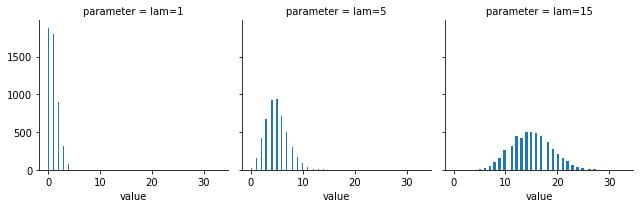

In [15]:
g = sns.FacetGrid(df_poisson_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=64)
plt.show()

The lam parameter specifies centres of the histogram on the x axis. Moreover, the higher the lam value, the more sqaushed the histogram.

4. beta Distribution

In [16]:
beta_dist = {"a=1  b=1":np.random.beta(a=1, b=1, size=5000),
            "a=5   b=0.7":np.random.beta(a=5, b=0.7, size=5000),
            "a=5   b=5":np.random.beta(a=5, b=5, size =5000),
            "a=0.7 b=0.7":np.random.beta(a=0.7, b=0.7, size=5000),
            "a=0.7 b=5":np.random.beta(a=0.7, b=5, size=5000)}

In [17]:
df_beta = pd.DataFrame(data=beta_dist)

In [18]:
df_beta_melt = pd.melt(df_beta, var_name='parameter', value_name='value')

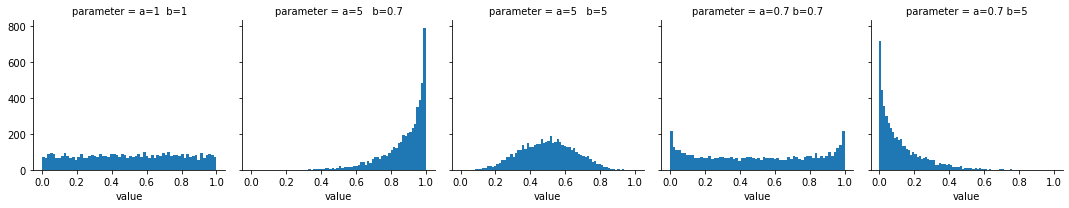

In [19]:
g = sns.FacetGrid(df_beta_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=64)
plt.show()

If the alpha and beta values are equal, the histogram is approxiamately symmetrical.

If alpha is higher, the histogram sways to the right side (1), and if beta is higher, the histogram sways to the left (0).

If parameters are bigger than 1, histogram is centralized around 0.5.

If parameters are lower than 1, it tends to spread sideways.

5. Log-normal Distribution

a) sigma dependency

In [20]:
log_norm = {"sigma=1":np.random.lognormal(size=5000),
            "sigma=0.7":np.random.lognormal(size=5000, sigma=0.7),
            "sigma=0.5":np.random.lognormal(size=5000, sigma=0.5),
            "sigma=0.3":np.random.lognormal(size=5000, sigma=0.3)}

In [21]:
df_log_norm = pd.DataFrame(data = log_norm)

In [22]:
df_log_norm_melt = pd.melt(df_log_norm, var_name='parameter', value_name='value')

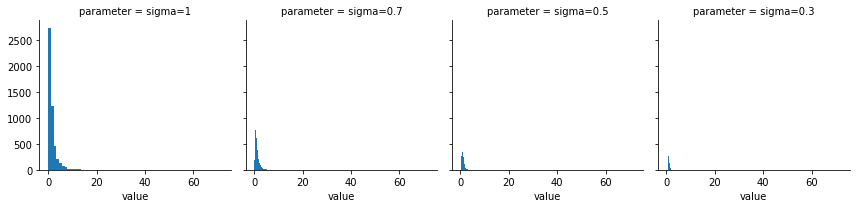

In [23]:
g = sns.FacetGrid(df_log_norm_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=64)

The shape of the histogram stays intact. Sigma value appers to scale the histogtam proportionally to its value.

b) mean dependency

In [24]:
log_norm = {"mean=0":np.random.lognormal(size=5000),
            "mean=1":np.random.lognormal(size=5000, mean=1),
           "mean=0.1":np.random.lognormal(size=5000, mean=0.1)}

In [25]:
df_log_norm = pd.DataFrame(data = log_norm)

In [26]:
df_log_norm_melt = pd.melt(df_log_norm, var_name='parameter', value_name='value')

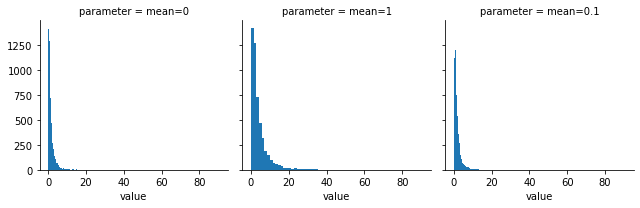

In [27]:
g = sns.FacetGrid(df_log_norm_melt,col="parameter",sharex=True)
g.map(plt.hist,'value',cumulative=False,bins=64)

Increasing the mean decreases the steepness of the histogram.